In [ ]:
#Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file (make sure data.csv is uploaded)
df = pd.read_csv('data.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   score  subject_encoded  level
0     32                0      0
1     45                1      0
2     67                0      1
3     81                1      1
4     55                0      1


In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Data types
print("\nData types:")
print(df.dtypes)



Summary statistics:
           score  subject_encoded      level
count  99.000000        99.000000  99.000000
mean   54.292929         0.494949   0.575758
std    16.172698         0.502519   0.496743
min    28.000000         0.000000   0.000000
25%    40.000000         0.000000   0.000000
50%    53.000000         0.000000   1.000000
75%    67.000000         1.000000   1.000000
max    90.000000         1.000000   1.000000

Missing values:
score              0
subject_encoded    0
level              0
dtype: int64

Data types:
score              int64
subject_encoded    int64
level              int64
dtype: object



Correlation matrix:
                    score  subject_encoded     level
score            1.000000        -0.136045  0.836153
subject_encoded -0.136045         1.000000 -0.090427
level            0.836153        -0.090427  1.000000


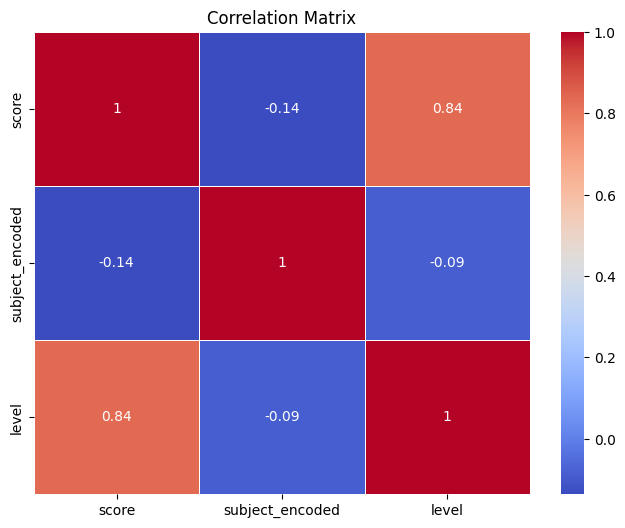

In [ ]:
# Correlation matrix
print("\nCorrelation matrix:")
print(df.corr())

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


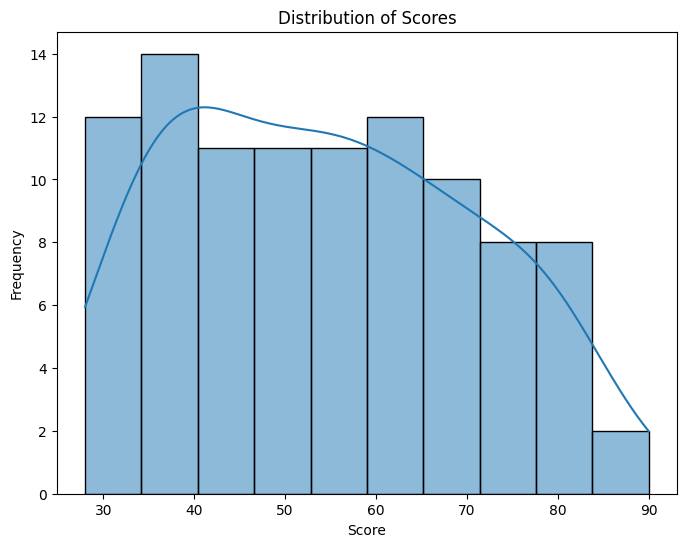

In [ ]:
#Visualisations
#1)Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['score'], bins=10, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


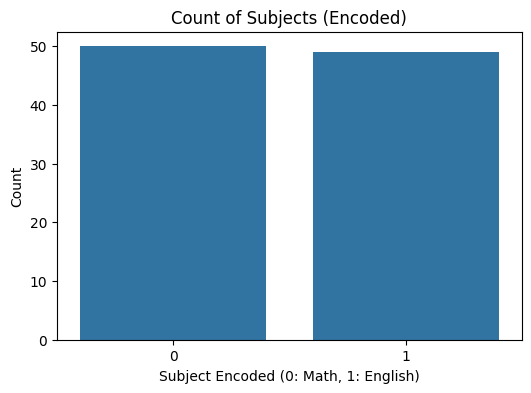

In [ ]:
#Count Plot for Subject Encoding

plt.figure(figsize=(6, 4))
sns.countplot(x='subject_encoded', data=df)
plt.title('Count of Subjects (Encoded)')
plt.xlabel('Subject Encoded (0: Math, 1: English)')
plt.ylabel('Count')
plt.show()

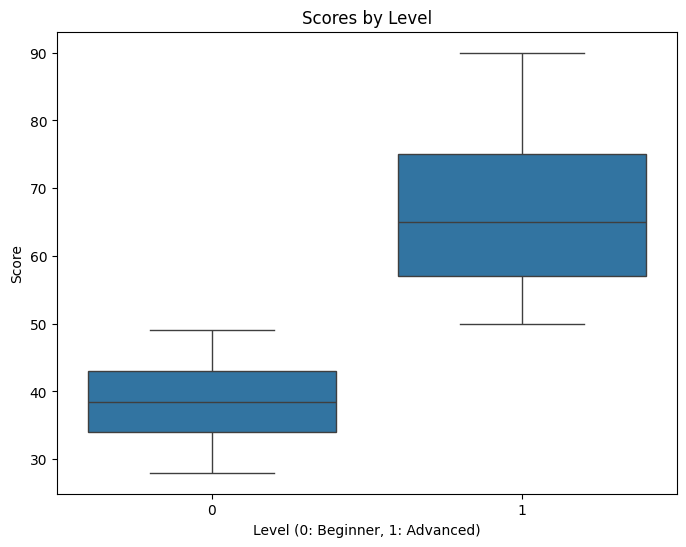

In [ ]:
#Box Plot for Scores by Level
plt.figure(figsize=(8, 6))
sns.boxplot(x='level', y='score', data=df)
plt.title('Scores by Level')
plt.xlabel('Level (0: Beginner, 1: Advanced)')
plt.ylabel('Score')
plt.show()


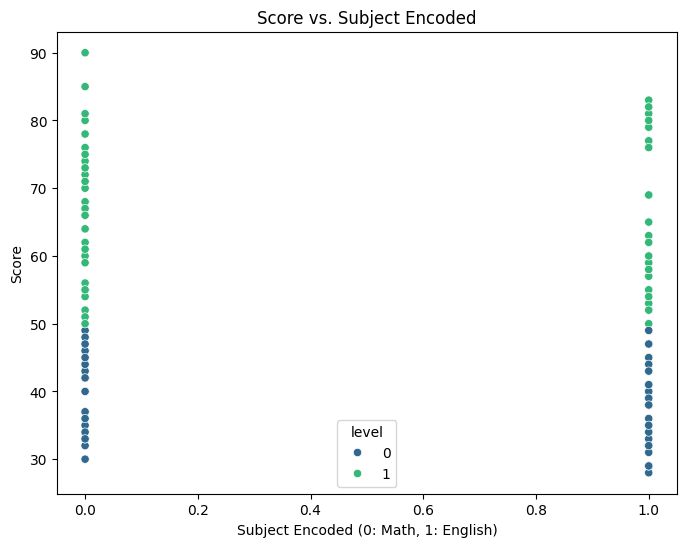

In [ ]:
#Scatter Plot of Score vs. Subject Encoding
plt.figure(figsize=(8, 6))
sns.scatterplot(x='subject_encoded', y='score', hue='level', data=df, palette="viridis")
plt.title('Score vs. Subject Encoded')
plt.xlabel('Subject Encoded (0: Math, 1: English)')
plt.ylabel('Score')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# Load the dataset (make sure data.csv is in your Colab session)
df = pd.read_csv('data.csv')
print("Dataset loaded:")
print(df.head())

# Define features (X) and target (y)
# Using 'score' and 'subject_encoded' as features and 'level' as target
X = df[['score', 'subject_encoded']]
y = df['level']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model with a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save the trained model to a file for later use (e.g., in your Flask app)
with open('ml_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model trained and saved as ml_model.pkl")


Dataset loaded:
   score  subject_encoded  level
0     32                0      0
1     45                1      0
2     67                0      1
3     81                1      1
4     55                0      1
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
[[ 5  0]
 [ 0 15]]
Model trained and saved as ml_model.pkl


In [ ]:
from google.colab import files
files.download('ml_model.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>